                                                                             Suyash Tambe
                                                                             22070126117
                                                                             AIML B2
                                                                             SML - Decision Tree

Part 1

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

<span style="color: brown;">***What is a Classification Task and why Decision tree is a reasonable model?***</span>

The classification task is to predict whether a breast mass is benign (non-cancerous) or malignant (cancerous) based on the features extracted from the digitized images.

A decision tree is a reasonable model to try for this data because:

Decision trees can handle both numerical and categorical features, making them suitable for the mixed feature types present in the dataset.
Decision trees are interpretable, allowing us to understand the rules and criteria used for classification, which can be crucial in medical diagnosis.
Decision trees can capture nonlinear relationships between features and the target variable, which might exist in the dataset.

<span style="color: brown;">***Summary of the Data***</span>

We can create a pair plot or a heatmap to visualize the relationships between the features and how they are correlated with each other. This can provide insights into the dataset's structure and potential predictive power.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=17) 
  
X = df.data.features 
y = df.data.targets 
  
# metadata 
print(df.metadata) 
  
# variable information 
print(df.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [10]:
X = df.data.features
y = df.data.targets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [20]:
# Fit a decision tree with default parameters
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [32]:
# Test the model
y_pred = dt_classifier.predict(X_test)

# Generate a classification report
print("accuracy_score:",accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

accuracy_score: 0.9438596491228071
Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.95      0.96       187
           M       0.90      0.94      0.92        98

    accuracy                           0.94       285
   macro avg       0.93      0.94      0.94       285
weighted avg       0.94      0.94      0.94       285

confusion_matrix:
 [[177  10]
 [  6  92]]


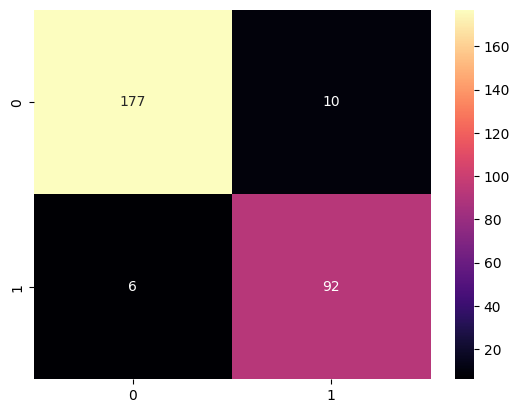

In [26]:
cm_display = confusion_matrix(y_test, dt_classifier.predict(X_test))
cm_display = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_display, annot=True, cmap='magma', fmt='g')
plt.show()


Classification Report with Entropy Criterion:
              precision    recall  f1-score   support

           B       0.97      0.90      0.94       187
           M       0.84      0.95      0.89        98

    accuracy                           0.92       285
   macro avg       0.90      0.93      0.91       285
weighted avg       0.93      0.92      0.92       285

confusion_matrix:
 [[177  10]
 [  6  92]]


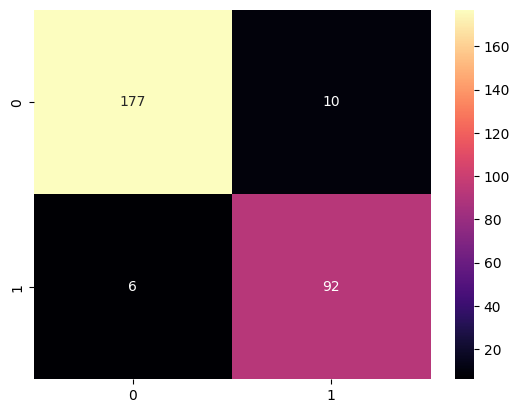

In [34]:
#  Fit a decision tree classifier with entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)

#  Test the model on the held-out testing data and generate a classification report
y_pred_entropy = clf_entropy.predict(X_test)
classification_report_entropy = classification_report(y_test, y_pred_entropy)

print("Classification Report with Entropy Criterion:")
print(classification_report_entropy)
print("confusion_matrix:\n", confusion_matrix(y_test, y_pred))

#  Inspect the model by visualizing the confusion matrix
cm_display = confusion_matrix(y_test, dt_classifier.predict(X_test))
cm_display = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_display, annot=True, cmap='magma', fmt='g')
plt.show()



 Part 2

In [36]:
# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Max_Depth', 'Accuracy', 'Precision', 'Recall'])


In [37]:
# Define the range of max_depth values to experiment with
max_depth_values = [1, 5, 10]

I will choose the **max_depth** parameter, which controls the maximum depth of the decision tree.

Hypothesis: Increasing the max_depth may initially improve the model's performance by allowing it to capture more complex relationships in the data. However, beyond a certain point, increasing max_depth may lead to overfitting, causing the model to memorize noise in the training data and perform poorly on unseen data.

In [47]:
# Iterate over each max_depth value
for max_depth in max_depth_values:
    # Retrain the model with the specified max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Test the model on the held-out testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # Append the results to the DataFrame
    results = pd.concat([results, pd.DataFrame({'Max_Depth': [max_depth], 
                                                 'Accuracy': [accuracy], 
                                                 'Precision': [precision], 
                                                 'Recall': [recall]})], ignore_index=True)

# Print the results
print(results)


  Max_Depth  Accuracy  Precision    Recall
0         1  0.908772   0.909365  0.908772
1         5  0.940351   0.941646  0.940351
2        10  0.943860   0.944775  0.943860


C:\Users\Suyash Tambe\AppData\Local\Temp\ipykernel_3536\886016861.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Max_Depth': [max_depth],


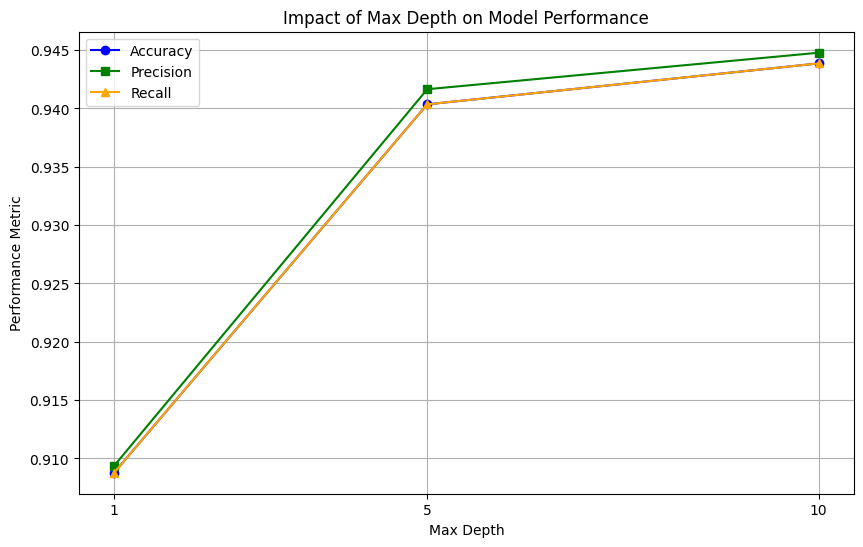

In [50]:
plt.figure(figsize=(10, 6))

plt.plot(results['Max_Depth'], results['Accuracy'], marker='o', label='Accuracy', color='blue')
plt.plot(results['Max_Depth'], results['Precision'], marker='s', label='Precision', color='green')
plt.plot(results['Max_Depth'], results['Recall'], marker='^', label='Recall', color='orange')

plt.xlabel('Max Depth')
plt.ylabel('Performance Metric')
plt.title('Impact of Max Depth on Model Performance')
plt.legend()
plt.grid(True)
plt.xticks(max_depth_values)

plt.show()


As we can see the the precision and recall line goes parallel to each other and the recall line overlaps the accuracy line

This indicates that changes in the maximum depth of the decision tree have a consistent impact on both precision and recall. It implies that increasing or decreasing the maximum depth affects both metrics proportionally.

 The fact that the recall line overlaps with the accuracy line indicates that the recall and accuracy values are closely related. When the model improves in recall, it also tends to improve in accuracy, and vice versa. This relationship suggests that the model's ability to correctly identify positive cases (recall) contributes significantly to its overall accuracy.



Part 3

In [51]:
results = []


In [52]:
# Define the training parameter combination
max_depth = 5
min_samples_split = 2
min_samples_leaf = 1

In [53]:
# Define the training percentages to evaluate
train_percentages = np.arange(0.2, 0.81, 0.1)

In [54]:
# Loop over different training percentages
for train_pct in train_percentages:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_pct, random_state=42)
    
    
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    clf.fit(X_train, y_train)
    
    
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    
   
    results.append({'train_pct': train_pct,
                    'n_train_samples': len(X_train),
                    'n_test_samples': len(X_test),
                    'train_acc': train_acc,
                    'test_acc': test_acc})


results_df = pd.DataFrame(results)

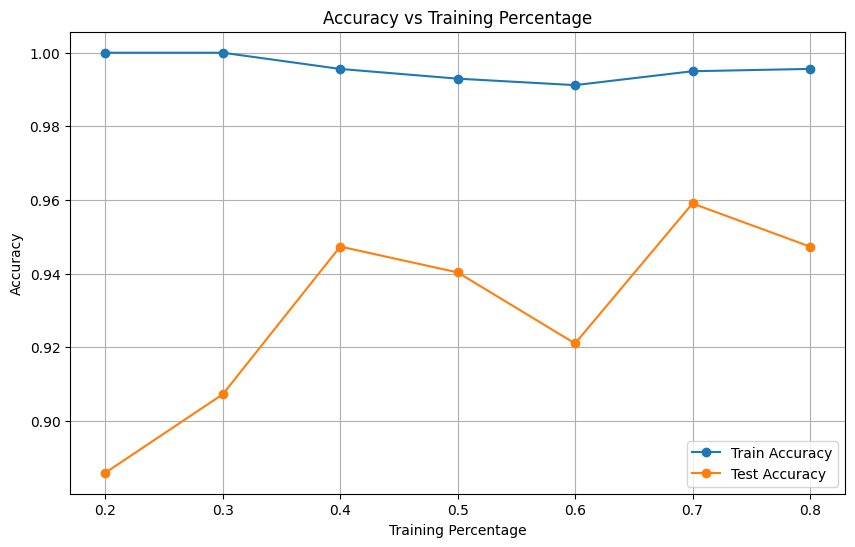

Best Test/Train Split:
train_pct            0.700000
n_train_samples    398.000000
n_test_samples     171.000000
train_acc            0.994975
test_acc             0.959064
Name: 5, dtype: float64


In [55]:
# Plot the accuracies vs training percentage
plt.figure(figsize=(10, 6))
plt.plot(results_df['train_pct'], results_df['train_acc'], marker='o', label='Train Accuracy')
plt.plot(results_df['train_pct'], results_df['test_acc'], marker='o', label='Test Accuracy')
plt.xlabel('Training Percentage')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Training Percentage')
plt.legend()
plt.grid(True)
plt.show()

# Find the best test/train split
best_split = results_df.loc[results_df['test_acc'].idxmax()]
print("Best Test/Train Split:")
print(best_split)

The best test/train split is achieved when approximately 70% of the data is used for training (train_pct = 0.7). Here's an explanation:

- <span style="color: brown;">High Training Accuracy:</span> The training accuracy (train_acc) is very high at approximately 99.5%. This indicates that the model has learned well from the training data and can accurately classify examples from the training set.

- <span style="color: brown;">High Testing Accuracy:</span> The testing accuracy (test_acc) is also high at approximately 95.9%. This suggests that the model generalizes well to unseen data, which is essential for reliable predictions on new, unseen samples.

- <span style="color: brown;">Balanced split :</span> With approximately 70% of the data used for training and 30% for testing, this split strikes a good balance between having sufficient data for the model to learn from and having a substantial amount of data for evaluating the model's performance. It avoids both underfitting (too little training data) and overfitting (too much training data).

Overall, the 70-30 split offers a good trade-off between model complexity and generalization performance, making it the best test/train split for this dataset and model configuration.